# Project Outline
1. Load data and Preprocessing
2. Text Vectorization
3. Train a Naive Bayes Classifier
4. Make Predictions and Evaluate
5. Data Visualization

# Load data and Preprocessing

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/kaggle/input/fifa-world-cup-2022-tweets/fifa_world_cup_2022_tweets.csv',
                   index_col=0)

In [3]:
print(data.head())

                Date Created  Number of Likes      Source of Tweet  \
0  2022-11-20 23:59:21+00:00                4      Twitter Web App   
1  2022-11-20 23:59:01+00:00                3   Twitter for iPhone   
2  2022-11-20 23:58:41+00:00                1   Twitter for iPhone   
3  2022-11-20 23:58:33+00:00                1      Twitter Web App   
4  2022-11-20 23:58:28+00:00                0  Twitter for Android   

                                               Tweet Sentiment  
0  What are we drinking today @TucanTribe \n@MadB...   neutral  
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...  positive  
2  Worth reading while watching #WorldCup2022 htt...  positive  
3  Golden Maknae shinning bright\n\nhttps://t.co/...  positive  
4  If the BBC cares so much about human rights, h...  negative  


In [4]:
X = data['Tweet']
y = data['Sentiment']

In [5]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization

In [6]:
# Initialize a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes Classifier

In [7]:
# Initialize and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

# Make Predictions and Evaluate

In [8]:
# Make predictions
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6841287458379578
Classification Report:
               precision    recall  f1-score   support

    negative       0.62      0.82      0.70      1149
     neutral       0.69      0.53      0.60      1648
    positive       0.74      0.74      0.74      1708

    accuracy                           0.68      4505
   macro avg       0.68      0.70      0.68      4505
weighted avg       0.69      0.68      0.68      4505



# Data Visualization

## Bar Plot - Sentiment Distribution

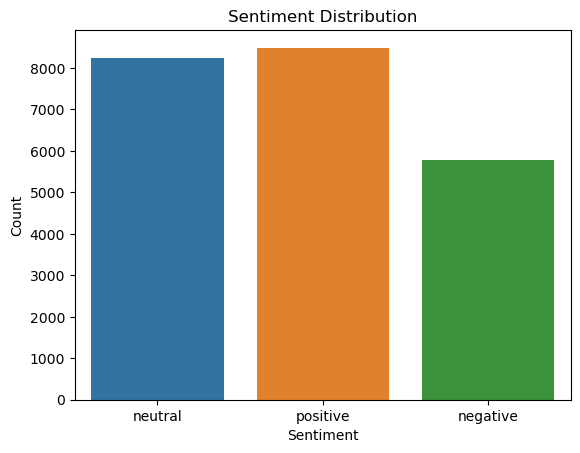

In [9]:
sns.countplot(data=data, x='Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## WordCloud

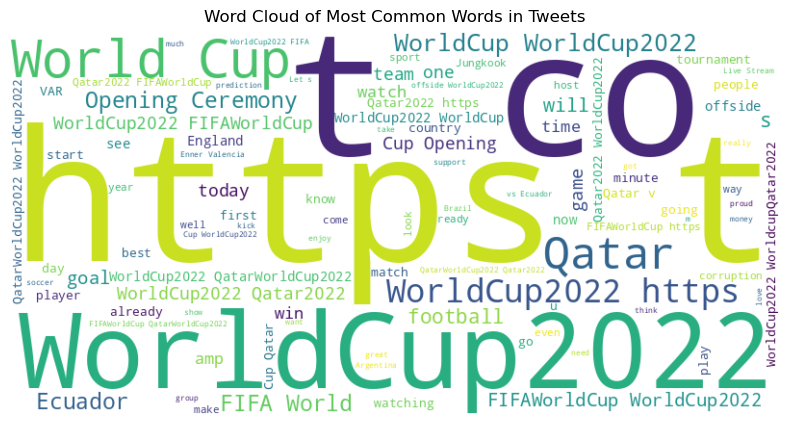

In [11]:
# Combine all the text into a single string
all_text = ' '.join(data['Tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Tweets')
plt.show()